In [1]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 52.2 MB/s eta 0:00:00


In [2]:
  pip show tensorflow_text

Name: tensorflow-text
Version: 2.12.1
Summary: TF.Text is a TensorFlow library of text related ops, modules, and subgraphs.
Home-page: http://github.com/tensorflow/text
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: tensorflow, tensorflow-hub
Required-by: 


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import nltk
nltk.download('stopwords')

import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# connecting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading dataset
data_true = pd.read_csv("/content/drive/My Drive/True.csv")
data_fake = pd.read_csv("/content/drive/My Drive/Fake.csv")


In [ ]:
data_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
data_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
data_fake.shape, data_true.shape

((23481, 4), (21417, 4))

In [ ]:
# appending labels to the true and fake dataset
data_true['Label'] = ['True']*len(data_true)
data_fake['Label'] = ['Fake']*len(data_fake)

In [ ]:
dataset = data_true.append(data_fake)
dataset = dataset.sample(frac=1).reset_index().drop(columns=['index'])


In [ ]:
dataset.head(10)

,title,text,subject,date,Label
0,GOP Civil War Brewing As Delegates Plot To De...,Donald Trump has been irritating everyone late...,News,"June 17, 2016",Fake
1,NSC WILL NOT Fulfill Subpoena Request For Susa...,Judicial Watch today announced that the Nation...,politics,"Jun 20, 2017",Fake
2,‘The Black Room’ Revealed: Fox News’ Secret S...,The fallout from the sexual harassment scandal...,News,"August 7, 2016",Fake
3,James Comey Is Doing Something That Will Have...,Trump s numerous attacks on former FBI Directo...,News,"July 16, 2017",Fake
4,UK's Mr Brexit says no vacancy for ambassador ...,LONDON (Reuters) - Britain’s Brexit Secretary ...,politicsNews,"November 22, 2016",True
5,Kerry says U.S. and Venezuela agree to start t...,SANTO DOMINGO (Reuters) - Venezuela and the Un...,politicsNews,"June 14, 2016",True
6,Trump-Loving KKK Leader’s Bloated Corpse Pull...,The body of Ku Klux Klan Imperial Wizard Frank...,News,"February 12, 2017",Fake
7,Virginia Republican Goodlatte will not seek re...,WASHINGTON (Reuters) - U.S. Representative Bob...,politicsNews,"November 9, 2017",True
8,WATCH: After Facing Angry Constituents At Tow...,Just one day after Paul Ryan failed to garner ...,News,"March 27, 2017",Fake
9,Germany warns against Turkey travel after spat...,BERLIN (Reuters) - Germany s foreign ministry ...,worldnews,"September 5, 2017",True


In [ ]:
dataset["Label"].value_counts()

Fake    23481
True    21417
Name: Label, dtype: int64

In [ ]:
# one hot encoding of labels
dataset['Label'] = pd.get_dummies(dataset.Label)['Fake']

In [ ]:
dataset.head(10)

,title,text,subject,date,Label
0,GOP Civil War Brewing As Delegates Plot To De...,Donald Trump has been irritating everyone late...,News,"June 17, 2016",1
1,NSC WILL NOT Fulfill Subpoena Request For Susa...,Judicial Watch today announced that the Nation...,politics,"Jun 20, 2017",1
2,‘The Black Room’ Revealed: Fox News’ Secret S...,The fallout from the sexual harassment scandal...,News,"August 7, 2016",1
3,James Comey Is Doing Something That Will Have...,Trump s numerous attacks on former FBI Directo...,News,"July 16, 2017",1
4,UK's Mr Brexit says no vacancy for ambassador ...,LONDON (Reuters) - Britain’s Brexit Secretary ...,politicsNews,"November 22, 2016",0
5,Kerry says U.S. and Venezuela agree to start t...,SANTO DOMINGO (Reuters) - Venezuela and the Un...,politicsNews,"June 14, 2016",0
6,Trump-Loving KKK Leader’s Bloated Corpse Pull...,The body of Ku Klux Klan Imperial Wizard Frank...,News,"February 12, 2017",1
7,Virginia Republican Goodlatte will not seek re...,WASHINGTON (Reuters) - U.S. Representative Bob...,politicsNews,"November 9, 2017",0
8,WATCH: After Facing Angry Constituents At Tow...,Just one day after Paul Ryan failed to garner ...,News,"March 27, 2017",1
9,Germany warns against Turkey travel after spat...,BERLIN (Reuters) - Germany s foreign ministry ...,worldnews,"September 5, 2017",0


In [ ]:
# data cleaning
def clean_data(text):
    text = re.sub('<[^>]*>', '', text)
    emoticon = re.findall('(?::|;|=)(?:-)?(?:\(|D|P)',text.lower())
    text = re.sub('[\W]+', ' ', text.lower())
    text += ' '.join(emoticon).replace('-', '')
    return text

In [ ]:
dataset["text"] = dataset["text"].apply(clean_data)

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def rmv_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
dataset["text"] =dataset["text"].map(rmv_stopwords)

In [ ]:
X = dataset["text"]
y = dataset["Label"]

In [ ]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.25)

In [ ]:
# importing the bert model
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# creating embeddings for each sentence
def embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)["pooled_output"] 

In [ ]:
embedding(["go home"])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-9.59798157e-01, -4.21478420e-01, -9.04650807e-01,
         9.32171047e-01,  7.25922585e-01, -1.63343042e-01,
         9.63028908e-01,  2.53664762e-01, -8.53743255e-01,
        -9.99994993e-01, -7.28642166e-01,  9.76342022e-01,
         9.87955630e-01,  5.10887921e-01,  9.65139508e-01,
        -8.31101120e-01, -6.54445708e-01, -6.52388036e-01,
         2.98883259e-01, -8.58494818e-01,  7.61531711e-01,
         9.99987543e-01, -5.80830202e-02,  2.36011460e-01,
         5.59319973e-01,  9.98666108e-01, -8.62367034e-01,
         9.66110587e-01,  9.80176687e-01,  7.05167830e-01,
        -8.26560676e-01,  1.82984799e-01, -9.92942333e-01,
        -1.49280608e-01, -8.72989416e-01, -9.96069610e-01,
         5.04737973e-01, -8.47799361e-01,  1.67610422e-01,
        -6.20282739e-02, -9.56214845e-01,  3.17191541e-01,
         9.99989748e-01,  4.53662515e-01,  5.30768514e-01,
        -2.16565356e-01, -1.00000000e+00,  3.55268329e-01,
      

In [ ]:
# bert layer
input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = "text")
preprocessed_text = bert_preprocess(input)
outputs = bert_encoder(preprocessed_text)
layer1= sequence_output = outputs["sequence_output"]



Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
outputs

{'default': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_1')>,
 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'kera

In [ ]:
1

In [ ]:
model = tf.keras.Model(inputs = [input], outputs = [layer1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

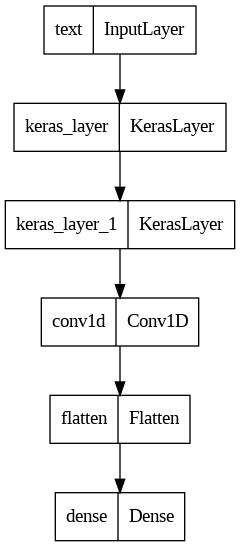

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
history = model.fit(X_train, y_train, epochs = 3,validation_split=0.1)

Epoch 1/3
948/948 [==============================] - 405s 409ms/step - loss: 0.0388 - accuracy: 0.9854 - val_loss: 0.0150 - val_accuracy: 0.9967
Epoch 2/3
948/948 [==============================] - 395s 417ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0057 - val_accuracy: 0.9976
Epoch 3/3
948/948 [==============================] - 394s 415ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0085 - val_accuracy: 0.9964


In [ ]:
model.evaluate(X_test, y_test)

351/351 [==============================] - 136s 386ms/step - loss: 0.0162 - accuracy: 0.9961


[0.01619991660118103, 0.9960801601409912]

In [ ]:
y_pred = np.ravel(model.predict(X_test))



351/351 [==============================] - 130s 368ms/step


In [ ]:
y_test

20401    0
32136    1
37014    1
13451    1
19454    0
        ..
32670    1
44129    1
28092    0
17588    1
9344     0
Name: Label, Length: 11225, dtype: uint8

In [ ]:
y_pred.shape

(11225,)

In [ ]:
import numpy as np

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
confusion

array([[5359,   44],
       [   0, 5822]])

Text(33.0, 0.5, 'True')

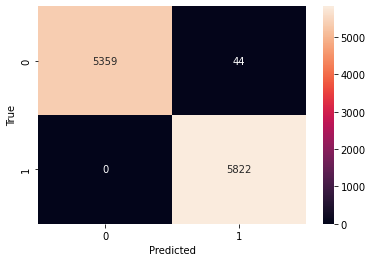

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(confusion,annot = True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5403
           1       0.99      1.00      1.00      5822

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



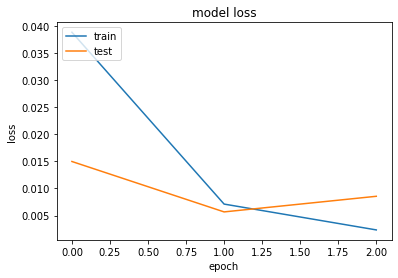

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

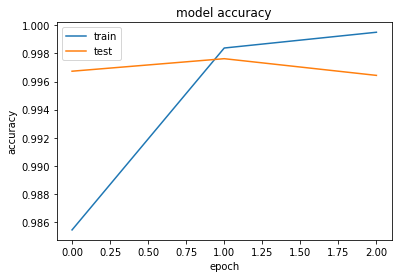

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()